# 1. Import and Install Dependencies

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow==2.5.0



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow-gpu==2.5.0


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install sklearn


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

## 2.Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

            # Read feed
        ret, frame = cap.read()

            # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)

            # Show to screen
        cv2.imshow('OpenCV Feed', image)

            # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.pose_landmarks.landmark)

33

In [14]:
draw_landmarks(frame, results)

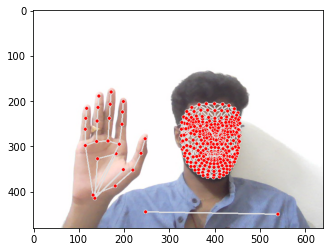

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.Extract Keypoint Values

In [17]:
results.pose_landmarks

landmark {
  x: 0.6326584
  y: 0.59718597
  z: -1.2799671
  visibility: 0.999991
}
landmark {
  x: 0.6541806
  y: 0.53084594
  z: -1.1835101
  visibility: 0.99998504
}
landmark {
  x: 0.66842955
  y: 0.5315031
  z: -1.1839164
  visibility: 0.99997437
}
landmark {
  x: 0.6840391
  y: 0.53199023
  z: -1.1836913
  visibility: 0.99997836
}
landmark {
  x: 0.59968495
  y: 0.5300454
  z: -1.1650436
  visibility: 0.9999854
}
landmark {
  x: 0.5768843
  y: 0.5313678
  z: -1.1638653
  visibility: 0.9999813
}
landmark {
  x: 0.556293
  y: 0.5337575
  z: -1.1642842
  visibility: 0.99998814
}
landmark {
  x: 0.70169634
  y: 0.5622421
  z: -0.61587846
  visibility: 0.9999734
}
landmark {
  x: 0.5208553
  y: 0.57492834
  z: -0.49625427
  visibility: 0.99998593
}
landmark {
  x: 0.6591289
  y: 0.6681742
  z: -1.0787057
  visibility: 0.999987
}
landmark {
  x: 0.5879854
  y: 0.6708763
  z: -1.0496032
  visibility: 0.9999828
}
landmark {
  x: 0.84453833
  y: 0.9364534
  z: -0.3289348
  visibility: 0.99

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose

[array([ 0.63265842,  0.59718597, -1.27996707,  0.999991  ]),
 array([ 0.65418059,  0.53084594, -1.18351007,  0.99998504]),
 array([ 0.66842955,  0.53150308, -1.18391645,  0.99997437]),
 array([ 0.68403912,  0.53199023, -1.18369126,  0.99997836]),
 array([ 0.59968495,  0.53004539, -1.16504359,  0.9999854 ]),
 array([ 0.57688433,  0.53136778, -1.16386533,  0.99998128]),
 array([ 0.55629301,  0.53375751, -1.16428423,  0.99998814]),
 array([ 0.70169634,  0.56224209, -0.61587846,  0.99997342]),
 array([ 0.52085531,  0.57492834, -0.49625427,  0.99998593]),
 array([ 0.6591289 ,  0.66817421, -1.07870567,  0.99998701]),
 array([ 0.5879854 ,  0.67087632, -1.04960322,  0.99998277]),
 array([ 0.84453833,  0.9364534 , -0.32893479,  0.99724311]),
 array([ 0.38798049,  0.92639154, -0.28290924,  0.99925655]),
 array([ 0.95641631,  1.40308297, -0.33373004,  0.10195743]),
 array([ 0.13877827,  1.29624629, -1.15169883,  0.9759118 ]),
 array([ 0.9304744 ,  1.73520017, -0.5895189 ,  0.2944442 ]),
 array([

In [20]:
len(results.face_landmarks.landmark)

468

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:

face

array([ 0.62747175,  0.65072834, -0.02596408, ...,  0.69082236,
        0.53111207,  0.01993836])

In [23]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
rh

array([ 2.07288504e-01,  8.49842131e-01,  3.88322206e-07,  2.83686668e-01,
        8.06901574e-01, -2.97305547e-02,  3.43922138e-01,  7.34973907e-01,
       -3.53803560e-02,  3.73276353e-01,  6.56316340e-01, -3.93300131e-02,
        3.86283696e-01,  5.90193093e-01, -4.18319441e-02,  2.97120124e-01,
        6.15242302e-01,  4.68047196e-03,  3.06743324e-01,  5.23447037e-01,
       -5.62559674e-03,  3.08568388e-01,  4.67713177e-01, -1.93097554e-02,
        3.11231971e-01,  4.19100165e-01, -3.00869513e-02,  2.58257926e-01,
        6.00190580e-01,  7.86013342e-03,  2.63391227e-01,  4.97121155e-01,
       -9.83869424e-04,  2.66500652e-01,  4.31309253e-01, -1.69889424e-02,
        2.69863486e-01,  3.76089305e-01, -2.94282939e-02,  2.20116794e-01,
        6.03614032e-01,  5.20548783e-03,  2.21046492e-01,  5.09163499e-01,
       -7.14263273e-03,  2.23786384e-01,  4.47657436e-01, -2.19413452e-02,
        2.26852939e-01,  3.94696176e-01, -3.25401165e-02,  1.80618674e-01,
        6.21004224e-01, -

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test=extract_keypoints(results)

In [27]:

result_test

array([ 0.63265842,  0.59718597, -1.27996707, ...,  0.18437731,
        0.45071596, -0.02818721])

In [28]:
result_test.shape

(1662,)

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 0.63265842,  0.59718597, -1.27996707, ...,  0.18437731,
        0.45071596, -0.02818721])

# 4.Setup Folders for Collection

In [37]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello',  'Thanks'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [38]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5.Collect Keypoint Values for Training and Testing

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6.Preprocess Data and Create Labels and Features

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
label_map = {label:num for num, label in enumerate(actions)}

In [42]:
label_map

{'Hello': 0, 'Thanks': 1}

In [43]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [44]:
np.array(sequences).shape

(60, 30, 1662)

In [45]:
np.array(labels).shape

(60,)

In [46]:
X = np.array(sequences)

In [47]:
X.shape

(60, 30, 1662)

In [48]:
y = to_categorical(labels).astype(int)

In [49]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [51]:
y_test.shape

(3, 2)

# 7.Build and Train LSTM Neural Network

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [53]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
res = [.7, 0.2, 0.1]

In [56]:
actions[np.argmax(res)]

'Hello'

In [94]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [84]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 6s 3s/step - loss: 7.3644 - categorical_accuracy: 0.5789
Epoch 2/2000
2/2 [==============================] - 0s 73ms/step - loss: 24.1034 - categorical_accuracy: 0.4737
Epoch 3/2000
2/2 [==============================] - 0s 66ms/step - loss: 11.1877 - categorical_accuracy: 0.4912
Epoch 4/2000
2/2 [==============================] - 0s 70ms/step - loss: 41.3772 - categorical_accuracy: 0.4737
Epoch 5/2000
2/2 [==============================] - 0s 64ms/step - loss: 67.2519 - categorical_accuracy: 0.3860
Epoch 6/2000
2/2 [==============================] - 0s 70ms/step - loss: 2.8528 - categorical_accuracy: 0.5789
Epoch 7/2000
2/2 [==============================] - 0s 69ms/step - loss: 16.7119 - categorical_accuracy: 0.4035
Epoch 8/2000
2/2 [==============================] - 0s 67ms/step - loss: 6.4946 - categorical_accuracy: 0.4386
Epoch 9/2000
2/2 [==============================] - 0s 60ms/step - loss: 7.1921 - categorical_accuracy: 0.561

2/2 [==============================] - 0s 54ms/step - loss: 4.8291 - categorical_accuracy: 0.5439
Epoch 74/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.3856 - categorical_accuracy: 0.4912
Epoch 75/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.6829 - categorical_accuracy: 0.5088
Epoch 76/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.8614 - categorical_accuracy: 0.5789
Epoch 77/2000
2/2 [==============================] - 0s 58ms/step - loss: 2.2034 - categorical_accuracy: 0.2281
Epoch 78/2000
2/2 [==============================] - 0s 70ms/step - loss: 3.1154 - categorical_accuracy: 0.2456
Epoch 79/2000
2/2 [==============================] - 0s 52ms/step - loss: 5.5263 - categorical_accuracy: 0.3509
Epoch 80/2000
2/2 [==============================] - 0s 64ms/step - loss: 3.1134 - categorical_accuracy: 0.2105
Epoch 81/2000
2/2 [==============================] - 0s 66ms/step - loss: 3.2034 - categorical_accuracy: 0.2807
Epoch 

2/2 [==============================] - 0s 67ms/step - loss: 1.1189 - categorical_accuracy: 0.8070
Epoch 146/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3865 - categorical_accuracy: 0.8947
Epoch 147/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.7099 - categorical_accuracy: 0.7368
Epoch 148/2000
2/2 [==============================] - 0s 60ms/step - loss: 4.6640 - categorical_accuracy: 0.5263
Epoch 149/2000
2/2 [==============================] - 0s 69ms/step - loss: 2.0228 - categorical_accuracy: 0.4737
Epoch 150/2000
2/2 [==============================] - 0s 60ms/step - loss: 2.3691 - categorical_accuracy: 0.4912
Epoch 151/2000
2/2 [==============================] - 0s 54ms/step - loss: 2.1278 - categorical_accuracy: 0.4912
Epoch 152/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.2222 - categorical_accuracy: 0.5088
Epoch 153/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.0488 - categorical_accuracy: 0.508

2/2 [==============================] - 0s 54ms/step - loss: 1.1219 - categorical_accuracy: 0.4211
Epoch 218/2000
2/2 [==============================] - 0s 50ms/step - loss: 14.7744 - categorical_accuracy: 0.5789
Epoch 219/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.5421 - categorical_accuracy: 0.3509
Epoch 220/2000
2/2 [==============================] - 0s 67ms/step - loss: 6.2757 - categorical_accuracy: 0.4737
Epoch 221/2000
2/2 [==============================] - 0s 66ms/step - loss: 10.8745 - categorical_accuracy: 0.5088
Epoch 222/2000
2/2 [==============================] - 0s 67ms/step - loss: 7.8368 - categorical_accuracy: 0.4211
Epoch 223/2000
2/2 [==============================] - 0s 65ms/step - loss: 2.3453 - categorical_accuracy: 0.5088
Epoch 224/2000
2/2 [==============================] - 0s 72ms/step - loss: 22.0575 - categorical_accuracy: 0.4912
Epoch 225/2000
2/2 [==============================] - 0s 56ms/step - loss: 13.2087 - categorical_accuracy: 0

2/2 [==============================] - 0s 58ms/step - loss: 0.6058 - categorical_accuracy: 0.6842
Epoch 290/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.6002 - categorical_accuracy: 0.7193
Epoch 291/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.5930 - categorical_accuracy: 0.7544
Epoch 292/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.5957 - categorical_accuracy: 0.7895
Epoch 293/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.5882 - categorical_accuracy: 0.7895
Epoch 294/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.5801 - categorical_accuracy: 0.7719
Epoch 295/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.5678 - categorical_accuracy: 0.7719
Epoch 296/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.5654 - categorical_accuracy: 0.7895
Epoch 297/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.5599 - categorical_accuracy: 0.771

2/2 [==============================] - 0s 62ms/step - loss: 0.4037 - categorical_accuracy: 0.8596
Epoch 362/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.3678 - categorical_accuracy: 0.8947
Epoch 363/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.4451 - categorical_accuracy: 0.7895
Epoch 364/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.3806 - categorical_accuracy: 0.8772
Epoch 365/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3885 - categorical_accuracy: 0.8421
Epoch 366/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.3847 - categorical_accuracy: 0.8246
Epoch 367/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.3836 - categorical_accuracy: 0.8772
Epoch 368/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.3530 - categorical_accuracy: 0.8772
Epoch 369/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3630 - categorical_accuracy: 0.877

2/2 [==============================] - 0s 56ms/step - loss: 0.8338 - categorical_accuracy: 0.4561
Epoch 434/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.5268 - categorical_accuracy: 0.2982
Epoch 435/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.6130 - categorical_accuracy: 0.5088
Epoch 436/2000
2/2 [==============================] - 0s 61ms/step - loss: 1.0215 - categorical_accuracy: 0.5965
Epoch 437/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.0121 - categorical_accuracy: 0.7719
Epoch 438/2000
2/2 [==============================] - 0s 50ms/step - loss: 11.8140 - categorical_accuracy: 0.4912
Epoch 439/2000
2/2 [==============================] - 0s 57ms/step - loss: 10.9944 - categorical_accuracy: 0.5088
Epoch 440/2000
2/2 [==============================] - 0s 59ms/step - loss: 3.4155 - categorical_accuracy: 0.5088
Epoch 441/2000
2/2 [==============================] - 0s 57ms/step - loss: 4.9175 - categorical_accuracy: 0.5

2/2 [==============================] - 0s 66ms/step - loss: 0.1697 - categorical_accuracy: 0.9649
Epoch 506/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0939 - categorical_accuracy: 0.9649
Epoch 507/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1565 - categorical_accuracy: 0.9474
Epoch 508/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1542 - categorical_accuracy: 0.9474
Epoch 509/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0843 - categorical_accuracy: 0.9825
Epoch 510/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1722 - categorical_accuracy: 0.9298
Epoch 511/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.0774 - categorical_accuracy: 0.9649
Epoch 512/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1147 - categorical_accuracy: 0.9825
Epoch 513/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1001 - categorical_accuracy: 0.964

2/2 [==============================] - 0s 64ms/step - loss: 0.0414 - categorical_accuracy: 0.9825
Epoch 578/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0417 - categorical_accuracy: 0.9825
Epoch 579/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.0409 - categorical_accuracy: 0.9825
Epoch 580/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.0404 - categorical_accuracy: 0.9825
Epoch 581/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0406 - categorical_accuracy: 0.9825
Epoch 582/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0403 - categorical_accuracy: 0.9825
Epoch 583/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0405 - categorical_accuracy: 0.9825
Epoch 584/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0405 - categorical_accuracy: 0.9825
Epoch 585/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0403 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 58ms/step - loss: 0.0343 - categorical_accuracy: 0.9825
Epoch 650/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0335 - categorical_accuracy: 0.9825
Epoch 651/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.0332 - categorical_accuracy: 0.9825
Epoch 652/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.0340 - categorical_accuracy: 0.9825
Epoch 653/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0334 - categorical_accuracy: 0.9825
Epoch 654/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0330 - categorical_accuracy: 0.9825
Epoch 655/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.0338 - categorical_accuracy: 0.9825
Epoch 656/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0331 - categorical_accuracy: 0.9825
Epoch 657/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0325 - categorical_accuracy: 0.982

2/2 [==============================] - 0s 67ms/step - loss: 0.0238 - categorical_accuracy: 1.0000
Epoch 722/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0236 - categorical_accuracy: 1.0000
Epoch 723/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0234 - categorical_accuracy: 1.0000
Epoch 724/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0232 - categorical_accuracy: 1.0000
Epoch 725/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0232 - categorical_accuracy: 1.0000
Epoch 726/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0231 - categorical_accuracy: 1.0000
Epoch 727/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0228 - categorical_accuracy: 1.0000
Epoch 728/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.0230 - categorical_accuracy: 1.0000
Epoch 729/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.0227 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 67ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 794/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 795/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.0135 - categorical_accuracy: 1.0000
Epoch 796/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 797/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 798/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 799/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 800/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 801/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0126 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 58ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 866/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 867/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 868/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 869/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 870/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 871/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 872/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 873/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0070 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 50ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 938/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 939/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 940/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 941/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 942/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 943/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 944/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 945/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.0043 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 61ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1010/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1011/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1012/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1013/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 1014/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1015/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1016/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 1017/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0029 - categorical_accurac

2/2 [==============================] - 0s 61ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1082/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1083/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1084/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1085/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 1086/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1087/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1088/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 1089/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0020 - categorical_accurac

2/2 [==============================] - 0s 67ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1154/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1155/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1156/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1157/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1158/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1159/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1160/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1161/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.0015 - categorical_accurac

2/2 [==============================] - 0s 63ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1226/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1227/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 1228/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1229/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1230/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1231/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1232/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1233/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0011 - categorical_accurac

2/2 [==============================] - 0s 73ms/step - loss: 8.9969e-04 - categorical_accuracy: 1.0000
Epoch 1296/2000
2/2 [==============================] - 0s 54ms/step - loss: 8.9602e-04 - categorical_accuracy: 1.0000
Epoch 1297/2000
2/2 [==============================] - 0s 57ms/step - loss: 8.9753e-04 - categorical_accuracy: 1.0000
Epoch 1298/2000
2/2 [==============================] - 0s 60ms/step - loss: 8.9085e-04 - categorical_accuracy: 1.0000
Epoch 1299/2000
2/2 [==============================] - 0s 53ms/step - loss: 8.9096e-04 - categorical_accuracy: 1.0000
Epoch 1300/2000
2/2 [==============================] - 0s 65ms/step - loss: 8.8486e-04 - categorical_accuracy: 1.0000
Epoch 1301/2000
2/2 [==============================] - 0s 60ms/step - loss: 8.8069e-04 - categorical_accuracy: 1.0000
Epoch 1302/2000
2/2 [==============================] - 0s 66ms/step - loss: 8.7760e-04 - categorical_accuracy: 1.0000
Epoch 1303/2000
2/2 [==============================] - 0s 60ms/step - lo

2/2 [==============================] - 0s 65ms/step - loss: 7.3242e-04 - categorical_accuracy: 1.0000
Epoch 1365/2000
2/2 [==============================] - 0s 59ms/step - loss: 7.2867e-04 - categorical_accuracy: 1.0000
Epoch 1366/2000
2/2 [==============================] - 0s 58ms/step - loss: 7.2837e-04 - categorical_accuracy: 1.0000
Epoch 1367/2000
2/2 [==============================] - 0s 65ms/step - loss: 7.2734e-04 - categorical_accuracy: 1.0000
Epoch 1368/2000
2/2 [==============================] - 0s 59ms/step - loss: 7.2313e-04 - categorical_accuracy: 1.0000
Epoch 1369/2000
2/2 [==============================] - 0s 56ms/step - loss: 7.2207e-04 - categorical_accuracy: 1.0000
Epoch 1370/2000
2/2 [==============================] - 0s 58ms/step - loss: 7.1920e-04 - categorical_accuracy: 1.0000
Epoch 1371/2000
2/2 [==============================] - 0s 60ms/step - loss: 7.1845e-04 - categorical_accuracy: 1.0000
Epoch 1372/2000
2/2 [==============================] - 0s 56ms/step - lo

2/2 [==============================] - 0s 66ms/step - loss: 6.0659e-04 - categorical_accuracy: 1.0000
Epoch 1434/2000
2/2 [==============================] - 0s 59ms/step - loss: 6.0544e-04 - categorical_accuracy: 1.0000
Epoch 1435/2000
2/2 [==============================] - 0s 58ms/step - loss: 6.0143e-04 - categorical_accuracy: 1.0000
Epoch 1436/2000
2/2 [==============================] - 0s 57ms/step - loss: 6.0176e-04 - categorical_accuracy: 1.0000
Epoch 1437/2000
2/2 [==============================] - 0s 66ms/step - loss: 6.0028e-04 - categorical_accuracy: 1.0000
Epoch 1438/2000
2/2 [==============================] - 0s 58ms/step - loss: 5.9655e-04 - categorical_accuracy: 1.0000
Epoch 1439/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.9448e-04 - categorical_accuracy: 1.0000
Epoch 1440/2000
2/2 [==============================] - 0s 62ms/step - loss: 5.9461e-04 - categorical_accuracy: 1.0000
Epoch 1441/2000
2/2 [==============================] - 0s 74ms/step - lo

2/2 [==============================] - 0s 59ms/step - loss: 5.0756e-04 - categorical_accuracy: 1.0000
Epoch 1503/2000
2/2 [==============================] - 0s 50ms/step - loss: 5.0613e-04 - categorical_accuracy: 1.0000
Epoch 1504/2000
2/2 [==============================] - 0s 57ms/step - loss: 5.0421e-04 - categorical_accuracy: 1.0000
Epoch 1505/2000
2/2 [==============================] - 0s 60ms/step - loss: 5.0327e-04 - categorical_accuracy: 1.0000
Epoch 1506/2000
2/2 [==============================] - 0s 59ms/step - loss: 5.0125e-04 - categorical_accuracy: 1.0000
Epoch 1507/2000
2/2 [==============================] - 0s 58ms/step - loss: 5.0133e-04 - categorical_accuracy: 1.0000
Epoch 1508/2000
2/2 [==============================] - 0s 57ms/step - loss: 4.9855e-04 - categorical_accuracy: 1.0000
Epoch 1509/2000
2/2 [==============================] - 0s 60ms/step - loss: 5.0061e-04 - categorical_accuracy: 1.0000
Epoch 1510/2000
2/2 [==============================] - 0s 58ms/step - lo

2/2 [==============================] - 0s 62ms/step - loss: 4.3014e-04 - categorical_accuracy: 1.0000
Epoch 1572/2000
2/2 [==============================] - 0s 57ms/step - loss: 4.2908e-04 - categorical_accuracy: 1.0000
Epoch 1573/2000
2/2 [==============================] - 0s 55ms/step - loss: 4.2789e-04 - categorical_accuracy: 1.0000
Epoch 1574/2000
2/2 [==============================] - 0s 69ms/step - loss: 4.2759e-04 - categorical_accuracy: 1.0000
Epoch 1575/2000
2/2 [==============================] - 0s 62ms/step - loss: 4.2642e-04 - categorical_accuracy: 1.0000
Epoch 1576/2000
2/2 [==============================] - 0s 62ms/step - loss: 4.2605e-04 - categorical_accuracy: 1.0000
Epoch 1577/2000
2/2 [==============================] - 0s 66ms/step - loss: 4.2456e-04 - categorical_accuracy: 1.0000
Epoch 1578/2000
2/2 [==============================] - 0s 60ms/step - loss: 4.2292e-04 - categorical_accuracy: 1.0000
Epoch 1579/2000
2/2 [==============================] - 0s 57ms/step - lo

2/2 [==============================] - 0s 57ms/step - loss: 3.6903e-04 - categorical_accuracy: 1.0000
Epoch 1641/2000
2/2 [==============================] - 0s 59ms/step - loss: 3.6831e-04 - categorical_accuracy: 1.0000
Epoch 1642/2000
2/2 [==============================] - 0s 59ms/step - loss: 3.6688e-04 - categorical_accuracy: 1.0000
Epoch 1643/2000
2/2 [==============================] - 0s 58ms/step - loss: 3.6595e-04 - categorical_accuracy: 1.0000
Epoch 1644/2000
2/2 [==============================] - 0s 61ms/step - loss: 3.6625e-04 - categorical_accuracy: 1.0000
Epoch 1645/2000
2/2 [==============================] - 0s 59ms/step - loss: 3.6501e-04 - categorical_accuracy: 1.0000
Epoch 1646/2000
2/2 [==============================] - 0s 58ms/step - loss: 3.6351e-04 - categorical_accuracy: 1.0000
Epoch 1647/2000
2/2 [==============================] - 0s 59ms/step - loss: 3.6307e-04 - categorical_accuracy: 1.0000
Epoch 1648/2000
2/2 [==============================] - 0s 57ms/step - lo

2/2 [==============================] - 0s 58ms/step - loss: 3.1778e-04 - categorical_accuracy: 1.0000
Epoch 1710/2000
2/2 [==============================] - 0s 65ms/step - loss: 3.1737e-04 - categorical_accuracy: 1.0000
Epoch 1711/2000
2/2 [==============================] - 0s 62ms/step - loss: 3.1656e-04 - categorical_accuracy: 1.0000
Epoch 1712/2000
2/2 [==============================] - 0s 58ms/step - loss: 3.1657e-04 - categorical_accuracy: 1.0000
Epoch 1713/2000
2/2 [==============================] - 0s 54ms/step - loss: 3.1579e-04 - categorical_accuracy: 1.0000
Epoch 1714/2000
2/2 [==============================] - 0s 51ms/step - loss: 3.1501e-04 - categorical_accuracy: 1.0000
Epoch 1715/2000
2/2 [==============================] - 0s 56ms/step - loss: 3.1428e-04 - categorical_accuracy: 1.0000
Epoch 1716/2000
2/2 [==============================] - 0s 58ms/step - loss: 3.1355e-04 - categorical_accuracy: 1.0000
Epoch 1717/2000
2/2 [==============================] - 0s 58ms/step - lo

2/2 [==============================] - 0s 58ms/step - loss: 2.7637e-04 - categorical_accuracy: 1.0000
Epoch 1779/2000
2/2 [==============================] - 0s 66ms/step - loss: 2.7579e-04 - categorical_accuracy: 1.0000
Epoch 1780/2000
2/2 [==============================] - 0s 58ms/step - loss: 2.7464e-04 - categorical_accuracy: 1.0000
Epoch 1781/2000
2/2 [==============================] - 0s 59ms/step - loss: 2.7429e-04 - categorical_accuracy: 1.0000
Epoch 1782/2000
2/2 [==============================] - 0s 58ms/step - loss: 2.7362e-04 - categorical_accuracy: 1.0000
Epoch 1783/2000
2/2 [==============================] - 0s 66ms/step - loss: 2.7349e-04 - categorical_accuracy: 1.0000
Epoch 1784/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.7247e-04 - categorical_accuracy: 1.0000
Epoch 1785/2000
2/2 [==============================] - 0s 64ms/step - loss: 2.7205e-04 - categorical_accuracy: 1.0000
Epoch 1786/2000
2/2 [==============================] - 0s 59ms/step - lo

2/2 [==============================] - 0s 57ms/step - loss: 2.4038e-04 - categorical_accuracy: 1.0000
Epoch 1848/2000
2/2 [==============================] - 0s 54ms/step - loss: 2.3969e-04 - categorical_accuracy: 1.0000
Epoch 1849/2000
2/2 [==============================] - 0s 59ms/step - loss: 2.3926e-04 - categorical_accuracy: 1.0000
Epoch 1850/2000
2/2 [==============================] - 0s 57ms/step - loss: 2.3885e-04 - categorical_accuracy: 1.0000
Epoch 1851/2000
2/2 [==============================] - 0s 59ms/step - loss: 2.3840e-04 - categorical_accuracy: 1.0000
Epoch 1852/2000
2/2 [==============================] - 0s 48ms/step - loss: 2.3803e-04 - categorical_accuracy: 1.0000
Epoch 1853/2000
2/2 [==============================] - 0s 61ms/step - loss: 2.3741e-04 - categorical_accuracy: 1.0000
Epoch 1854/2000
2/2 [==============================] - 0s 59ms/step - loss: 2.3704e-04 - categorical_accuracy: 1.0000
Epoch 1855/2000
2/2 [==============================] - 0s 58ms/step - lo

2/2 [==============================] - 0s 60ms/step - loss: 2.0907e-04 - categorical_accuracy: 1.0000
Epoch 1917/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.0879e-04 - categorical_accuracy: 1.0000
Epoch 1918/2000
2/2 [==============================] - 0s 79ms/step - loss: 2.0842e-04 - categorical_accuracy: 1.0000
Epoch 1919/2000
2/2 [==============================] - 0s 73ms/step - loss: 2.0806e-04 - categorical_accuracy: 1.0000
Epoch 1920/2000
2/2 [==============================] - 0s 71ms/step - loss: 2.0755e-04 - categorical_accuracy: 1.0000
Epoch 1921/2000
2/2 [==============================] - 0s 70ms/step - loss: 2.0730e-04 - categorical_accuracy: 1.0000
Epoch 1922/2000
2/2 [==============================] - 0s 80ms/step - loss: 2.0667e-04 - categorical_accuracy: 1.0000
Epoch 1923/2000
2/2 [==============================] - 0s 66ms/step - loss: 2.0623e-04 - categorical_accuracy: 1.0000
Epoch 1924/2000
2/2 [==============================] - 0s 71ms/step - lo

2/2 [==============================] - 0s 58ms/step - loss: 1.8375e-04 - categorical_accuracy: 1.0000
Epoch 1986/2000
2/2 [==============================] - 0s 61ms/step - loss: 1.8328e-04 - categorical_accuracy: 1.0000
Epoch 1987/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.8329e-04 - categorical_accuracy: 1.0000 0s - loss: 1.8329e-04 - categorical_accuracy: 1.00
Epoch 1988/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.8234e-04 - categorical_accuracy: 1.0000
Epoch 1989/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.8205e-04 - categorical_accuracy: 1.0000
Epoch 1990/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.8187e-04 - categorical_accuracy: 1.0000
Epoch 1991/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.8158e-04 - categorical_accuracy: 1.0000
Epoch 1992/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.8125e-04 - categorical_accuracy: 1.0000
Epoch 1993/2000
2/2 [

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

# 8.Make Predictions

In [86]:
res = model.predict(X_test)

In [89]:
actions[np.argmax(res[2])]

'Thanks'

In [90]:
actions[np.argmax(y_test[2])]


'Thanks'

# 9.Save Weights

In [91]:
model.save('action.h5')

In [92]:
del model

In [95]:
model.load_weights('action.h5')

# 10.Evaluation using Confusion Matrix and Accuracy

In [96]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [97]:
yhat = model.predict(X_test)

In [98]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [103]:
 ytrue

[1, 0, 1]

In [100]:
yhat

[1, 0, 1]

In [101]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 1]],

       [[1, 0],
        [0, 2]]], dtype=int64)

In [102]:
accuracy_score(ytrue, yhat)

1.0

# 11.Test in Real Time

In [104]:
from scipy import stats

In [105]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

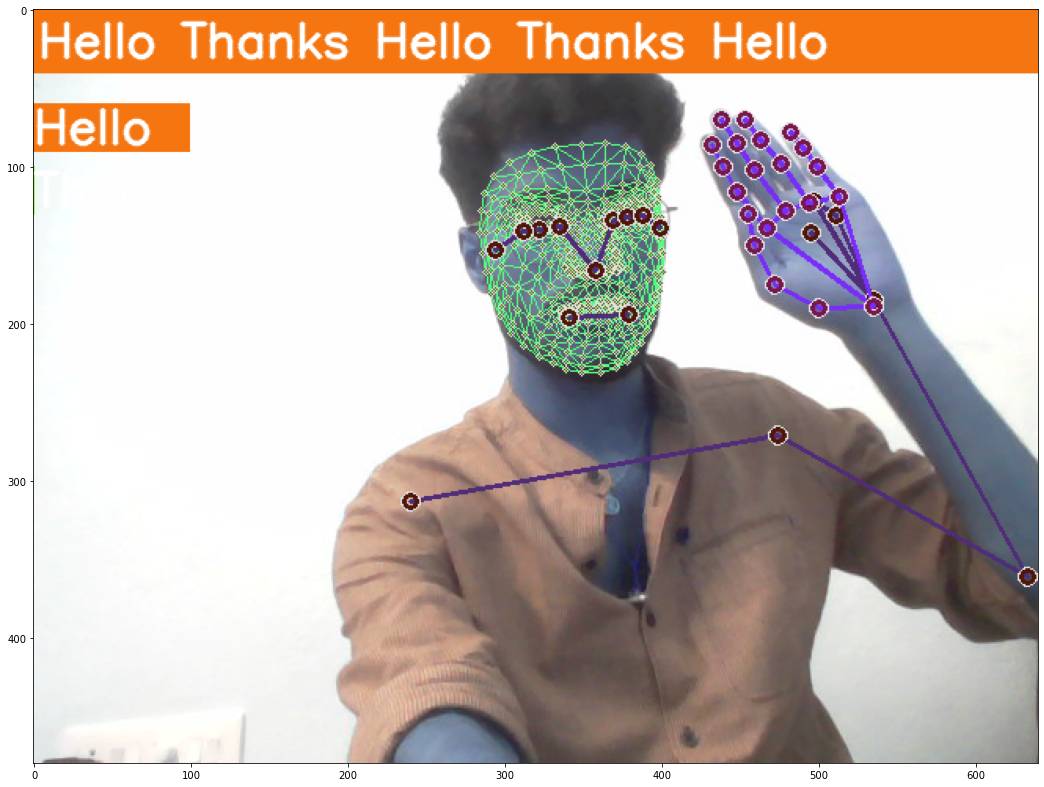

In [108]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [109]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.Solut

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.Solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOut

Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.S